Naive-Bayes Classifier-Supervised Learning Algorithm<br>
Mainly used for text classification<br>
Based on Bayes Theorem<br>
Seeing Accuracy of model for various datasets

Importing Required Libraries

In [60]:
# Importing Numpy
import numpy as np
# To read csv file
import pandas as pd
# For splitting between training and testing
from sklearn.model_selection import train_test_split
# Importing Algorithm
from sklearn.naive_bayes import GaussianNB
# For checking/Evaluating accuracy of model and printing the confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
# For Plotting
import matplotlib.pyplot as plt
# For Saving model as pkl file
import pickle

Data Gathering<br>
Glucose and blood pressure as input and diabetes as output<br>
Model will predict if person is diabetic or not

In [61]:
data=pd.read_csv("Naive-Bayes-Classification-Data.csv")
print("Data is:\n",data)
print("\nInformation about Dataframe is:\n",data.info)

Data is:
      glucose  bloodpressure  diabetes
0         40             85         0
1         40             92         0
2         45             63         1
3         45             80         0
4         40             73         1
..       ...            ...       ...
990       45             87         0
991       40             83         0
992       40             83         0
993       40             60         1
994       45             82         0

[995 rows x 3 columns]

Information about Dataframe is:
 <bound method DataFrame.info of      glucose  bloodpressure  diabetes
0         40             85         0
1         40             92         0
2         45             63         1
3         45             80         0
4         40             73         1
..       ...            ...       ...
990       45             87         0
991       40             83         0
992       40             83         0
993       40             60         1
994       45             8

Data Preprocessing is not required as data is already cleaned<br>
Splitting between Input(X) and Output(Y)

In [62]:
X,Y=data.drop("diabetes",axis=1),data['diabetes']
print("Input is:\n",X,"\n","Output is:\n",Y)
# Splitting data into training and testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
print("Shape of x_train(training data) for dataset is:",x_train.shape,"Shape of y_train(testing data) for dataset is:",y_train.shape)

Input is:
      glucose  bloodpressure
0         40             85
1         40             92
2         45             63
3         45             80
4         40             73
..       ...            ...
990       45             87
991       40             83
992       40             83
993       40             60
994       45             82

[995 rows x 2 columns] 
 Output is:
 0      0
1      0
2      1
3      0
4      1
      ..
990    0
991    0
992    0
993    1
994    0
Name: diabetes, Length: 995, dtype: int64
Shape of x_train(training data) for dataset is: (796, 2) Shape of y_train(testing data) for dataset is: (796,)


Choosing algorithm

In [63]:
nb=GaussianNB()
# Training the model
nb.fit(x_train,y_train)

GaussianNB()

Evaluating/Testing the model

In [64]:
print("Training Accuracy is:",nb.score(x_train,y_train)*100)
predicted_data=nb.predict(x_test)
print("Predicted Data is:\n",predicted_data)
print("Testing Accuracy is:",accuracy_score(y_test,predicted_data)*100)
# Printing Confusion Matrix
print("Confusion Matrix is:\n",confusion_matrix(y_test,predicted_data))

Training Accuracy is: 93.5929648241206
Predicted Data is:
 [1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 0 1 0 0 0 1]
Testing Accuracy is: 92.46231155778895
Confusion Matrix is:
 [[104   9]
 [  6  80]]


Because this dataset has a lot of overlapping points<br>
Add a small amount of jitter to the data points

In [65]:
jittered_glucose = X["glucose"] + np.random.normal(0, 0.5, len(X))
jittered_bloodpressure = X["bloodpressure"] + np.random.normal(0, 0.5, len(X))
# Increase point size to make them more visible
point_size = 20  # Adjust the size as needed

In [66]:
# Define a mapping for colors based on labels (1 for diabetic, 0 for not diabetic)
color_map = {1: 'yellow', 0: 'purple'}

# Create a list of colors corresponding to each data point
colors = [color_map[label] for label in Y]

Plotting according to diabetic or not

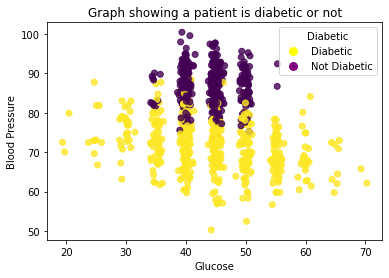

In [67]:
# Adding transparency because there are lots of overlapping points
plt.scatter(jittered_glucose,jittered_bloodpressure,c=Y,alpha=0.8)
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.title("Graph showing a patient is diabetic or not")
# Create a legend with labels "Diabetic" and "Not Diabetic"
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=("Diabetic" if label == 1 else "Not Diabetic")) for label, color in color_map.items()]
plt.legend(handles=handles, title='Diabetic')
plt.show()

Saving model to disk

In [68]:
pickle.dump(nb, open('model.pkl','wb'))